<table>
<tr>    
<td style="text-align: center">
<h1>Uczenie transferowe oraz zamrażanie warstw i dostrajanie sieci</h1>
<h2><a href="http://home.agh.edu.pl/~horzyk/index.php">Adrian Horzyk</a></h2>
</td> 
<td>
<img src="http://home.agh.edu.pl/~horzyk/im/AdrianHorzyk49BT140h.png" alt="Adrian Horzyk, Professor" title="Adrian Horzyk, Professor" />        
</td> 
</tr>
</table>
<h3><i>Zapraszam do interaktywnego notebooka, w którym możesz dowiedzieć się, jak działają sieci neuronowe, doświadczysz i sprawdzisz ich działanie na wybranych zbiorach danych i przeprowadzisz własne eksperymenty!</i></h3>

# Transfer Learning (uczenie transferowe), czyli korzystanie z wcześniej przeszkolonej sieci convnet

----
Powszechnym i bardzo skutecznym podejściem do głębokiego uczenia się na małych obrazach jest wykorzystanie wstępnie wytrenowanej sieci, co nazywamy <b>uczeniem transferowym (<i>transfer learning</i>)</b>. Wstępnie wytrenowana sieć to po prostu zapisana sieć, wcześniej nauczona na dużym zbiorze danych, zazwyczaj w ramach zadania klasyfikacji obrazów na dużą skalę. Jeśli ten duży zbiór danych jest wystarczająco reprezentatywny (czyli obejmuje przestrzeń danych wejściowych), wówczas hierarchia cech przestrzennych poznana przez wstępnie wytrenowaną sieć może skutecznie działać jako ogólny model naszego wizualnego świata. Co więcej, jego funkcje mogą okazać się przydatne w przypadku wielu różnych problemów związanych z wizją komputerową, nawet jeśli problemy te mogą dotyczyć zupełnie innych klas niż zadania, do których trenowano pierwotną sieć, aczkolwiek dane wejściowe powinny być podobne. Na przykład można wytrnować sieć na zbiorze ImageNet, a następnie ponownie wykorzystać tą wytrenowaną sieć do identyfikacji np. elementów mebli na obrazach. Taka przenośność wyuczonych wzorców w ramach różnych problemów jest kluczową zaletą głębokiego uczenia się w porównaniu z wieloma starszymi podejściami do płytkiego uczenia się i sprawia, że głębokie uczenie się jest bardzo skuteczne w przypadku problemów związanych z małymi danymi.

W naszym przypadku rozważymy dużą sieć wytrenowaną na zbiorze danych ImageNet (który zawiera ponad 1,4 miliona obrazów 1000 klas, którymi są głównie zwierzęta i przedmioty codziennego użytku). Zawiera wiele klas zwierząt, w tym różne gatunki kotów i psów, dlatego możemy spodziewać się bardzo dobrych wyników w naszym problemie klasyfikacji kotów i psów.

Wykorzystamy jedną z popularnych architektur (prostą i szeroko stosowaną architekturę convnet VGG16, opracowaną przez Karen Simonyan i Andrew Zissermana w 2014 r.) przeszkoloną na ImageNet. Wybieramy architekturę VGG, ponieważ jest ona podobna do tego, co już znamy - sekwencyjnego modelu wielowarstwowego. Jest to jedna z tych uroczych nazw modeli (VGG, ResNet, Inception, Inception-ResNet, Xception), do których się przyzwyczaisz, ponieważ będą się często pojawiać, jeśli będziesz kontynuować głębokie uczenie się widzenia komputerowego.

Istnieją dwa sposoby wykorzystania wstępnie wytrenowanej sieci: <b>wyodrębnianie funkcji</b> i <b>dostrajanie</b>. Omówimy oba z nich. Zacznijmy od ekstrakcji cech.


## Ekstrakcja cech i przenoszenie podstawy splotowej

<b>Ekstrakcja cech</b> polega na wykorzystaniu wyuczonych przez sieć reprezentacji (wzorców) w przeszłości w celu wyodrębnienia przydatnych i częstych cech z nowych próbek. Funkcje te są następnie przekazywane do nowego klasyfikatora, który jest trenowany od podstaw. Ten nowy klasyfikator może mieć różną architekturę sieci (liczba warstw, liczba neuronów w warstwach, funkcje aktywacyjne i liczba wyników) i można go wytrenować do innego zadania obliczeniowego.

Convnets używane do klasyfikacji obrazów zwykle składają się z dwóch części:
* zaczynają się od serii warstw łączenia, usuwania i splotu, oraz
* kończą się gęsto powiązanym klasyfikatorem.

Pierwsza część nazywana jest <b>podstawą splotową (bazą konwolucyjną)</b> modelu. W przypadku sieci konwolucyjnych <b>ekstrakcja cech</b> będzie po prostu polegać na wzięciu podstawy splotu wcześniej wytrenowanej sieci.
Następnie przepuszczamy przez niego nowe dane i trenujemy nowy klasyfikator na podstawie danych wyjściowych bazy splotowej dla naszych nowych zadań predykcji (tutaj klasyfikacji):

![zamiana w pełni połączonego klasyfikatora](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/TransferredConvolutionalBase.png)

Zwykle ponownie używamy bazy splotowej tylko dlatego, że gęsto powiązany klasyfikator nauczył się specyficznego i innego zestawu reprezentacji klas, co byłoby trudne w użyciu. Z drugiej strony, bazy splotowe będą prawdopodobnie bardziej ogólne, a zatem bardziej przydatne do ponownego użycia, ponieważ mapy cech sieci konwolucyjnej są mapami obecności ogólnych koncepcji ( i wzorców) na obrazach, co prawdopodobnie będzie przydatne niezależnie od problemu dotyczącego wizji komputerowej. Dodatkowo reprezentacje znajdujące się w gęsto połączonych warstwach nie zawierają już informacji o tym, gdzie w obrazie wejściowym znajdują się obiekty: warstwy te pozbywają się pojęcia przestrzeni, podczas gdy położenie obiektu nadal opisywane jest za pomocą map obiektów splotowych. W przypadku problemów, w których istotna jest lokalizacja obiektu, gęsto powiązane ze sobą funkcje byłyby w dużej mierze bezużyteczne.

Należy zauważyć, że poziom ogólności i możliwość ponownego wykorzystania reprezentacji wyodrębnionych przez określone warstwy splotu zależy od głębokości warstwy w modelu. Warstwy znajdujące się wcześniej w modelu wyodrębniają lokalne, bardzo ogólne mapy obiektów (takie jak wizualne krawędzie, kolory i tekstury), podczas gdy warstwy znajdujące się wyżej wyodrębniają bardziej abstrakcyjne pojęcia (takie jak „ucho kota” lub „oko psa”). Jeśli więc nowy zbiór danych znacznie różni się od zbioru danych, na którym uczono oryginalny model, lepszym rozwiązaniem może być użycie tylko kilku pierwszych warstw bazy splotowej do ekstrakcji cech odpowiednio dostosowanej do zbioru danych, zamiast używać całego bazy splotowej/konwolucyjnej.

W naszym przypadku, ponieważ zbiór klas ImageNet rzeczywiście zawierał wiele klas psów i kotów, korzystne może być ponowne wykorzystanie informacji zawartych w gęsto połączonych warstwach oryginalnego modelu, np. dodanie na wierzchu dodatkowej gęstej warstwy. Postaramy się jednak omówić bardziej ogólny przypadek, w którym zbiór klas nowego problemu nie pokrywa się ze zbiorem klas oryginalnego modelu.

Zastosujmy to w praktyce, wykorzystując splotową bazę sieci VGG16, wytrenowaną na zbiorze ImageNet, aby wyodrębnić interesujące cechy z naszych obrazów kotów i psów, a następnie ucząc nowy klasyfikator kotów i psów na podstawie tych funkcji.

Między innymi model VGG16 jest dostarczany z preinstalowanym pakietem Keras, więc możemy go zaimportować z modułu `keras.applications`. Oto lista modeli klasyfikacji obrazów (wszystkie wytrenowane w zbiorze danych ImageNet), które są dostępne w ramach `keras.applications`:

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

Utwórzmy instancję modelu VGG16 o strukturze sekwencyjnej, którą już znamy:

In [1]:
import keras
keras.__version__

'2.8.0'

In [3]:
#from keras.applications import VGG16
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 3s 0us/step


Przekazaliśmy konstruktorowi trzy argumenty:

* `weights` (wagi), aby określić, z którego punktu kontrolnego wagi należy zainicjować model;
* `include_top`, które odnosi się do włączania lub nie gęsto połączonego klasyfikatora na szczycie sieci;
* `input_shape`, czyli kształt tensorów obrazu, który podamy do sieci (jeśli go nie określimy, sieć będzie mogła przetwarzać wejścia o dowolnej wielkości).

Spójrzmy na zaimportowaną architekturę bazy splotowej VGG16:

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Baza splotowa VGG16 składa się z pięciu bloków splotowych o różnej liczbie warstw konwolucyjnych i różnej liczbie filtrów. Ostateczna mapa obiektów ma kształt `(4, 4, 512)`. To jest warstwa mapy obiektów, na którą umieścimy gęsto połączony klasyfikator.

Możemy postępować na dwa sposoby:

* Uruchomienie bazy splotowej na naszym zbiorze danych, zapisanie jej wyników w tablicy Numpy na dysku, a następnie wykorzystanie tych danych jako danych wejściowych do samodzielnego, gęsto połączonego klasyfikatora. To rozwiązanie jest bardzo szybkie i tanie w uruchomieniu, ponieważ wymaga tylko jednokrotnego uruchomienia bazy splotowej dla każdego obrazu wejściowego, a baza splotowa jest zdecydowanie najbardziej obciążającą obliczeniowo częścią potoku przetwarzania danych w tych sieciach. Jednak z tego samego powodu technika ta uniemożliwiałaby zastosowanie metody powielania (augmentacji) danych, co ogranicza możliwość adaptacji modelu.
* Zamrozić model (`conv_base`) i rozszerzyć go, dodając gęsto połączony klasyfikator (`Dense`) na górze i uruchamiając cały model od początku do końca na danych wejściowych. Dzięki temu możemy zastosować powielanie (augmentację) danych, ponieważ każdy obraz wejściowy przechodzi przez bazę splotową za każdym razem, gdy jest widziany przez model. Jednak z tego samego powodu ta technika jest znacznie droższa niż pierwsza.

Omówimy i wykorzystamy obydwie te techniki. Przyjrzyjmy się kodowi wymaganemu do skonfigurowania pierwszego: zapisanie wyników operacji `conv_base` na naszych danych i wykorzystanie tych wyników jako danych wejściowych do nowego modelu klasyfikacji.

Zaczniemy od prostego uruchomienia instancji wcześniej wprowadzonego `ImageDataGenerator` w celu wyodrębnienia obrazów jako tablic Numpy wraz z ich etykietami. Wyodrębnimy funkcje z tych obrazów, po prostu wywołując metodę `predict` modelu `conv_base`.


In [6]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# The directory where we will store our smaller dataset
#base_dir = 'https://home.agh.edu.pl/~horzyk/ml/data/kaggle/processed/cats_and_dogs_small'
base_dir = 'C:/ml/data/kaggle/processed/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, batch_size, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        # put the input data through the conv_base and store the outputs in features
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a for-loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, batch_size, 2000)
validation_features, validation_labels = extract_features(validation_dir, batch_size, 1000)
test_features, test_labels = extract_features(test_dir, batch_size, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Wyodrębnione cechy mają obecnie kształt `(samples, 4, 4, 512)`, więc jeśli chcemy je wykorzystać do "nakarmienia" gęsto połączonego klasyfikatora `Dense`, najpierw musimy je spłaszczyć do `(samples, 4 * 4 * 512)` , czyli `(samples, 8192)`:

In [7]:
#print (train_features.shape)
#print (validation_features.shape)
#print (test_features.shape)
#flatten_layer_size = train_features.shape[1] * train_features.shape[2] * train_features.shape[3]
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))
print (train_features.shape)
print (validation_features.shape)
print (test_features.shape)
flatten_layer_size = train_features.shape[1]  # 4 * 4 * 512

(2000, 8192)
(1000, 8192)
(1000, 8192)


W tym momencie możemy zdefiniować nasz gęsto połączony klasyfikator i wytrenować go na danych i etykietach, które właśnie zarejestrowaliśmy:

In [9]:
import tensorflow
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop

model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim=flatten_layer_size))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history3 = model3.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 6s 42ms/step - loss: 0.5883 - acc: 0.6885 - val_loss: 0.4459 - val_acc: 0.8400
Epoch 2/30
100/100 [==============================] - 4s 37ms/step - loss: 0.4151 - acc: 0.8170 - val_loss: 0.3608 - val_acc: 0.8740
Epoch 3/30
100/100 [==============================] - 3s 35ms/step - loss: 0.3473 - acc: 0.8505 - val_loss: 0.3346 - val_acc: 0.8590
Epoch 4/30
100/100 [==============================] - 4s 38ms/step - loss: 0.3111 - acc: 0.8805 - val_loss: 0.2971 - val_acc: 0.8930
Epoch 5/30
100/100 [==============================] - 3s 34ms/step - loss: 0.2815 - acc: 0.8930 - val_loss: 0.2918 - val_acc: 0.8780
Epoch 6/30
100/100 [==============================] - 3s 34ms/step - loss: 0.2571 - acc: 0.8970 - val_loss: 0.2688 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2427 - acc: 0.9160 - val_loss: 0.2636 - val_acc: 0.9010
Epoch 8/30
100/100 [==============================] - 3s 34ms/step - 

In [10]:
# The path to store trained models
models_dir = 'C:/ml/models/'
if not os.path.exists(models_dir):
    os.mkdir(models_dir)
    
model3.save(models_dir + 'cats_and_dogs_small_3a.h5')

Jak widać, trening jest bardzo szybki, gdyż mamy do czynienia tylko z dwiema „gęstymi” warstwami `Dense`.

Przyjrzyjmy się krzywym strat `loss` i dokładności `accuracy` podczas treningu:

In [11]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25, 5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25, 5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 432x288 with 0 Axes>

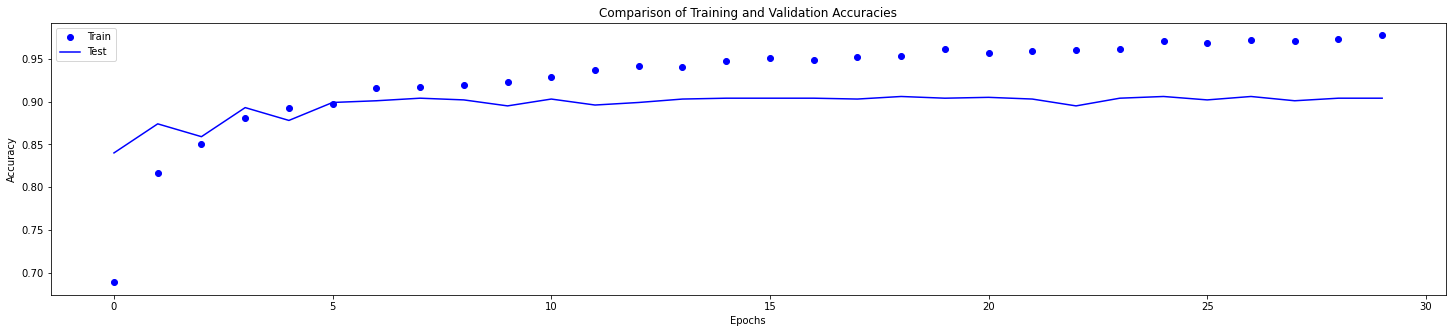

<Figure size 432x288 with 0 Axes>

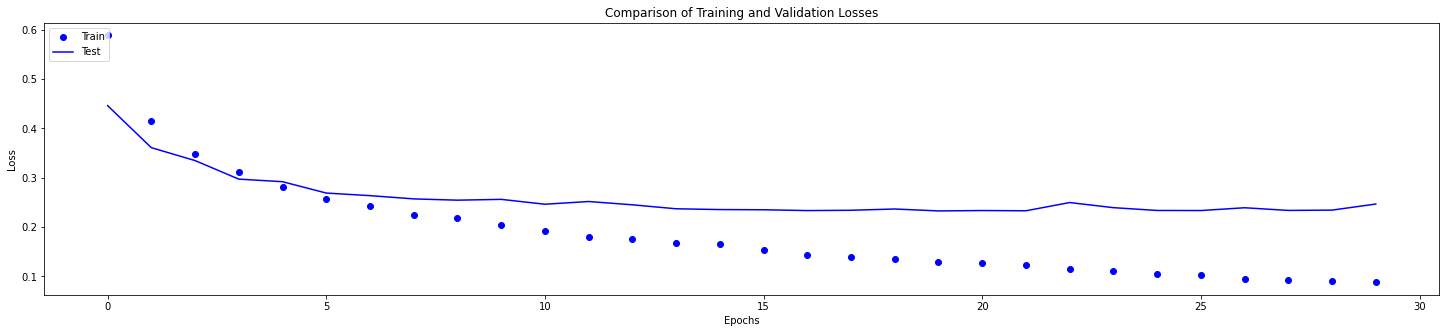

In [12]:
import matplotlib.pyplot as plt

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotAccuracyComparison(acc3, val_acc3, lab = 'Model 3')
PlotLossComparison(loss3, val_loss3, lab = 'Model 3')

Po 30 epokach osiągamy dokładność walidacji na poziomie około 90% – czyli znacznie lepiej niż to, co mogliśmy osiągnąć w poprzednim modelu wytrenowanym od podstaw na naszym małym zbiorze danych. Jednak nasze wykresy wskazują również, że niemal od początku mamy do czynienia z przeuczeniem modelu (overfittingiem), pomimo stosowania dropoutu z dość dużym współczynnikiem. Dzieje się tak, ponieważ technika ta nie wykorzystuje powielania (augmentacji) danych, co jest niezbędne, aby zapobiec nadmiernemu dopasowaniu w przypadku małych zbiorów danych zawierających obrazy.

Teraz użyjmy drugiej techniki ekstrakcji cech, która jest znacznie wolniejsza i droższa, ale pozwala nam wykorzystać powielenie (augmentację) danych podczas uczenia poprzez rozszerzenie modelu `conv_base` i uruchomienie go od początku do końca na wejściach. Pamiętaj, że ta technika jest w rzeczywistości tak droga, że powinieneś jej używać tylko wtedy, gdy masz dostęp do procesora graficznego GPU: jest ona praktycznie niewykonalna na klasycznym procesorze CPU! Jeśli nie możesz uruchomić kodu na GPU, najlepszym rozwiązaniem będzie poprzednia technika.

Ponieważ modele zachowują się jak warstwy, możesz dodać model (np. naszą bazę `conv_base`) do modelu `Sequential` (sekwencyjnego) tak samo, jak dodajesz warstwę. Możesz więc wykonać następujące czynności:

In [13]:
from keras import models
from keras import layers

model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Jak widać, splotowa baza VGG16 ma 14.714.688 parametrów! Klasyfikator, który dodajemy na szczycie sieci, ma tylko około 2.097.408 parametrów.

Zanim skompilujemy i wytrenujemy nasz model, bardzo ważną rzeczą jest zamrożenie bazy splotowej. „Zamrożenie” ("Freezing") warstwy lub zestawu warstw oznacza zapobieganie aktualizacji ich wag (`weights`) podczas treningu. Jeśli tego nie zrobimy, reprezentacje, których wcześniej nauczyła się baza splotowa, ulegną modyfikacji i nieodrawcalnemu zniszczeniu podczas uczenia. Ponieważ warstwy gęste `Dense` na szczycie sieci są inicjowane losowo (na początku nic nie jest wytrenowane), bardzo duże aktualizacje wag będą propagowane przez sieć wstecz, skutecznie niszcząc reprezentacje wyuczone wcześniej i przesłane do tego modelu na skutek transferu bazy konwolucyjnej.

W Keras zamrażanie sieci odbywa się poprzez ustawienie jej atrybutu `trainable` na `False`:

In [15]:
print('This is the number of trainable weights before freezing the conv base:', len(model3.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


Teraz zamrażamy `conv_base` i ponownie sprawdzamy liczbę możliwych do wyszkolenia wag:

In [16]:
conv_base.trainable = False

In [18]:
print('This is the number of trainable weights after freezing the conv base:', len(model3.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


Po zamrożeniu bazy konwolucyjnej/splotowej `conv_base` trenowane będą tylko wagi i odchylenia z dwóch warstw `Dense`. Otrzymujemy tutaj całkowitą liczbę użytych tensorów: po dwa na warstwę (główna macierz wag i wektor obciążenia (bias)). Należy pamiętać, że aby te zmiany (zamrożenie) odniosły skutek, musimy skompilować model. Jeśli kiedykolwiek zmodyfikujesz możliwość uczenia wag po kompilacji, powinieneś skompilować model, w przeciwnym razie zmiany te zostaną zignorowane.

Teraz możemy rozpocząć trening naszego modelu z tą samą konfiguracją powiększania danych, której użyliśmy w poprzednim przykładzie:

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model3.compile(loss='binary_crossentropy',
              #optimizer=optimizers.RMSprop(lr=2e-5),
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

# https://keras.io/api/models/model_training_apis/
#history = model3.fit_generator(
history = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 274s - loss: 0.5701 - acc: 0.7185 - val_loss: 0.4420 - val_acc: 0.8360 - 274s/epoch - 3s/step
Epoch 2/30
100/100 - 300s - loss: 0.4777 - acc: 0.7825 - val_loss: 0.3694 - val_acc: 0.8620 - 300s/epoch - 3s/step
Epoch 3/30
100/100 - 302s - loss: 0.4392 - acc: 0.8125 - val_loss: 0.3355 - val_acc: 0.8700 - 302s/epoch - 3s/step
Epoch 4/30
100/100 - 307s - loss: 0.4109 - acc: 0.8165 - val_loss: 0.3285 - val_acc: 0.8650 - 307s/epoch - 3s/step
Epoch 5/30
100/100 - 298s - loss: 0.4011 - acc: 0.8135 - val_loss: 0.3026 - val_acc: 0.8790 - 298s/epoch - 3s/step
Epoch 6/30
100/100 - 297s - loss: 0.3812 - acc: 0.8315 - val_loss: 0.2901 - val_acc: 0.8820 - 297s/epoch - 3s/step
Epoch 7/30
100/100 - 286s - loss: 0.3773 - acc: 0.8330 - val_loss: 0.2853 - val_acc: 0.8810 - 286s/epoch - 3s/step
Epoch 8/30
100/100 - 292s - loss: 0.3579 - acc: 0.8475 - val_loss: 0.2858 - val_acc: 0.8790 - 292s/epoch - 3s/s

In [21]:
model3.save(models_dir + 'cats_and_dogs_small_3.h5')

Przedstawmy jeszcze raz nasze wyniki na wykresie:

<Figure size 432x288 with 0 Axes>

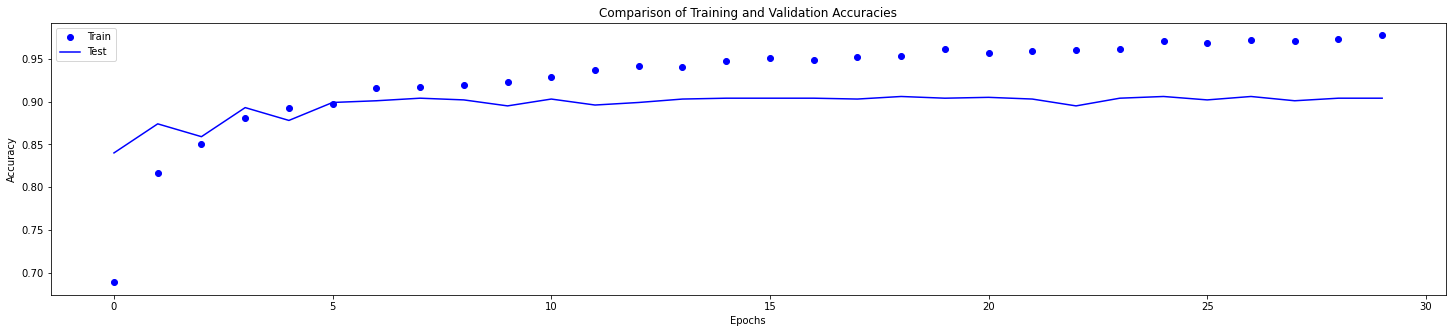

<Figure size 432x288 with 0 Axes>

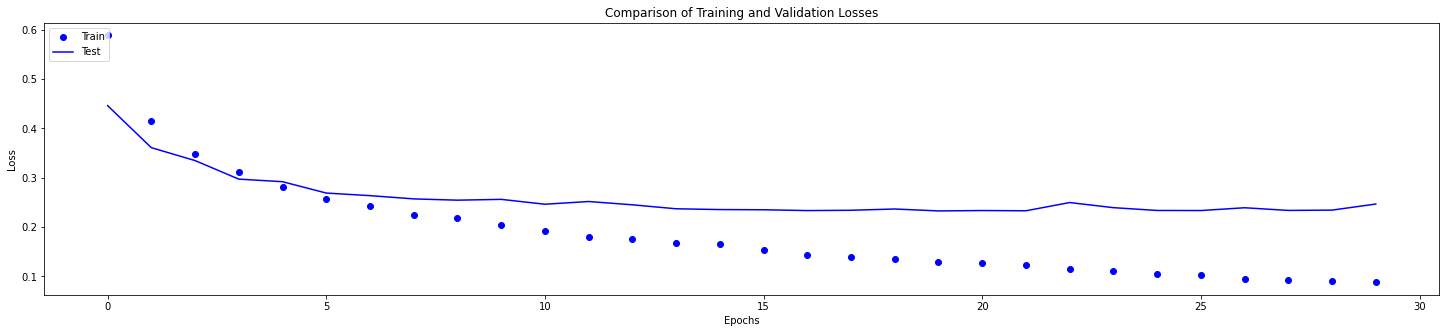

In [22]:
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotAccuracyComparison(acc3, val_acc3, lab = 'Model 3')
PlotLossComparison(loss3, val_loss3, lab = 'Model 3')

Jak widać, dokładność walidacji osiągamy na poziomie około 94%. To znacznie lepsze rozwiązanie niż nasza mała convnet (model2) szkolona od podstaw.

## Strojenie

Inną szeroko stosowaną techniką ponownego wykorzystania modelu, uzupełniającą ekstrakcję cech, jest tzw. <b>dostrajanie (<i>tuning</i>) modelu</b>.
Dostrajanie polega na odmrożeniu kilku górnych warstw zamrożonej bazy modelu wykorzystywanej do ekstrakcji cech i wspólnym trenowaniu zarówno nowo dodanej części modelu (w naszym przypadku w pełni połączonego klasyfikatora), jak i tych górnych warstw, reprezentujących cechy bardziej abstrakcyjne. Nazywa się to <b>dostrajaniem</b> (<i>tuning</i>), ponieważ nieznacznie dostosowuje bardziej abstrakcyjne reprezentacje ponownie wykorzystywanego modelu, aby uczynić je bardziej odpowiednimi dla danego (obecnie rozwiązywanego) problemu.

![Sieć VGG-16 z 4 blokami zamrożonymi i 1 blokiem dostrojonym oraz klasyfikatorem](http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/VGG16-partially-frozen.png)

Stwierdziliśmy wcześniej, że konieczne było zamrożenie podstawy splotu VGG16, aby móc wytrenować losowo zainicjowany klasyfikator na górze. Z tego samego powodu dostrojenie górnych warstw podstawy splotowej jest możliwe dopiero po wytrenowaniu klasyfikatora znajdującego się na górze (szczycie). Jeżeli klasyfikator nie zostałaby wytrenowany wystarczająco, wówczas sygnał błędu propagujący się w sieci podczas uczenia byłby zbyt duży, a reprezentacje wyuczone wcześniej przez dostrajane warstwy uległyby zniszczeniu. Zatem kroki dostrajania sieci są następujące:

<ol>
     <li>Dodaj swoją niestandardową sieć do już przeszkolonej bazy sieci.</li>
     <li>Zablokuj/Zamroź bazę konwolucyjną sieci.</li>
     <li>Trenuj dodaną część (np. klasyfikator).</li>
     <li>Odblokuj/Odmroź ostatnie warstwy w bazie sieci.</li>
     <li>Wspólnie trenuj obie niezamrożone warstwy i dodaną część.</li>
     <li>Chociaż wyniki nie są jeszcze zadowalające, a cechy reprezentowane w ostatnich warstwach nie odpowiadają naszemu problemowi</li>
     <ol>
         <li>Odblokuj/Odmroź kilka dodatkowych ostatnich warstw w bazie sieci.</li>
         <li>Wspólnie trenuj obie niezamrożone warstwy i dodaną część.</li>
     </ol>
</ol>
   
Wykonaliśmy już pierwsze 3 kroki podczas ekstrakcji cech. Przejdźmy teraz do czwartego kroku: odmrozimy naszą bazę `conv_base`, a następnie zamrozimy w niej poszczególne warstwy.

Dla przypomnienia tak wygląda nasza baza splotowa:

In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Dopracujemy ostatnie 3 warstwy splotowe, co oznacza, że wszystkie warstwy aż do `block4_pool` powinny zostać zamrożone, a warstwy `block5_conv1`, `block5_conv2` i `block5_conv3` powinny ponownie stać się możliwe do trenowania (odmrożone).

Moglibyśmy dostroić więcej warstw lub nawet całą bazę splotową. Powinniśmy jednak wziąć pod uwagę, że:

* Wcześniejsze warstwy w bazie splotowej kodują bardziej ogólne cechy/wzorce, które można ponownie wykorzystać, podczas gdy warstwy znajdujące się wyżej kodują bardziej wyspecjalizowane/abstrakcyjne cechy/wzorce. Bardziej przydatne jest dostrojenie tych bardziej wyspecjalizowanych, ponieważ to przede wszystkim one wymagają dostosowania do naszego nowego problemu. W przypadku dostrajania niższych warstw zwroty przyniosłyby szybko malejące zyski.
* Im więcej parametrów trenujemy, tym większe jest ryzyko przeuczenia się. W naszym przypadku baza splotowa ma ponad 14M parametrów, więc próba jej uczenia na naszym małym zbiorze danych byłaby ryzykowna.

Zatem w naszej sytuacji dobrą strategią jest dostrojenie tylko 2–3 górnych warstw podstawy splotowej.

Skonfigurujmy to i odblokujmy trzy warstwy piątego bloku splotowego:

In [24]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Teraz możemy przystąpić do dostrajania naszej sieci. Zrobimy to za pomocą optymalizatora RMSprop, stosując wolne uczenie się (`lr=1e-5`), ponieważ chcemy ograniczyć wielkość modyfikacji, które wprowadzamy do reprezentacji 3 warstw 5. bloku splotowego, które dostrajamy. Zbyt duże aktualizacje mogą uszkodzić te reprezentacje.

Przejdźmy teraz do dostrajania:

In [25]:
model3.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

#history4 = model3.fit_generator(
history4 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 290s 3s/step - loss: 0.3049 - acc: 0.8640 - val_loss: 0.2819 - val_acc: 0.8810
Epoch 2/100
100/100 [==============================] - 289s 3s/step - loss: 0.2812 - acc: 0.8780 - val_loss: 0.2156 - val_acc: 0.9140
Epoch 3/100
100/100 [==============================] - 295s 3s/step - loss: 0.2602 - acc: 0.8900 - val_loss: 0.2239 - val_acc: 0.9100
Epoch 4/100
100/100 [==============================] - 296s 3s/step - loss: 0.2524 - acc: 0.8940 - val_loss: 0.1952 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 305s 3s/step - loss: 0.2307 - acc: 0.8980 - val_loss: 0.1947 - val_acc: 0.9160
Epoch 6/100
100/100 [==============================] - 296s 3s/step - loss: 0.1997 - acc: 0.9185 - val_loss: 0.1937 - val_acc: 0.9240
Epoch 7/100
100/100 [==============================] - 294s 3s/step - loss: 0.1950 - acc: 0.9190 - val_loss: 0.1929 - val_acc: 0.9240
Epoch 8/100
100/100 [==============================] - 291s 3s

In [26]:
model3.save(models_dir + 'cats_and_dogs_small_4.h5')

Narysujmy nasze wyniki, używając tego samego kodu, co poprzednio:

<Figure size 432x288 with 0 Axes>

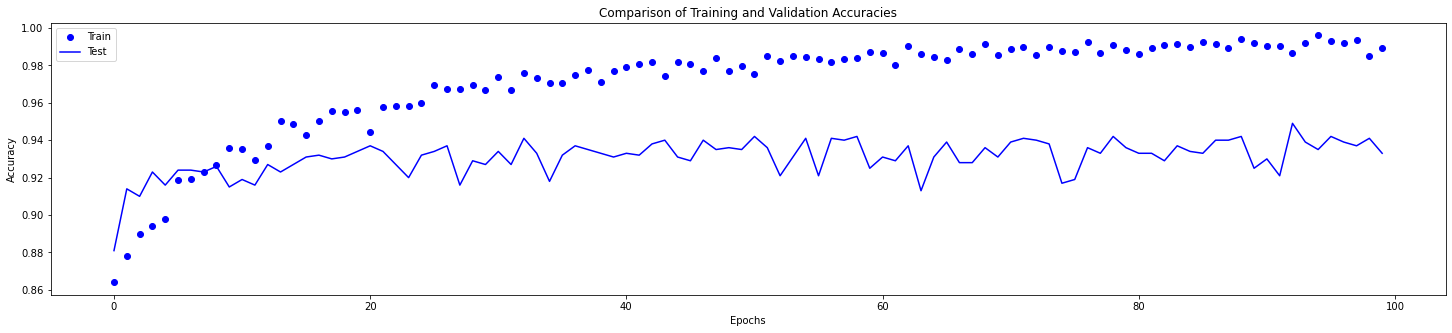

<Figure size 432x288 with 0 Axes>

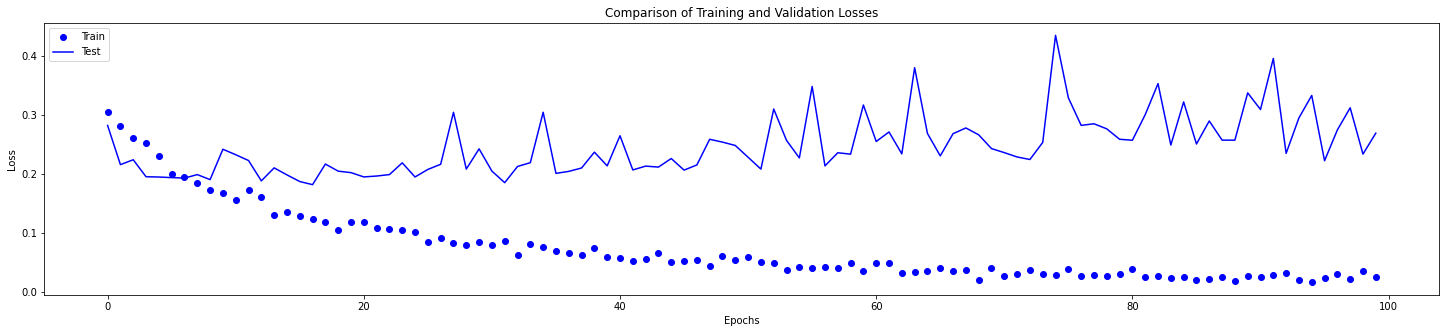

In [27]:
import matplotlib.pyplot as plt

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

PlotAccuracyComparison(acc4, val_acc4, lab = 'Model 4 - fined tuned the 5th conv-block')
PlotLossComparison(loss4, val_loss4, lab = 'Model 4 - fined tuned the 5th conv-block')

Te krzywe fluktuują. Aby uczynić je bardziej czytelnymi, możemy je wygładzić, zastępując każdą stratę i dokładność przemieszczającą się średnią wykładniczą (exponential moving averages) z tych ilości. Aby to zrobić, użyj trywialnej funkcji, jak poniżej:

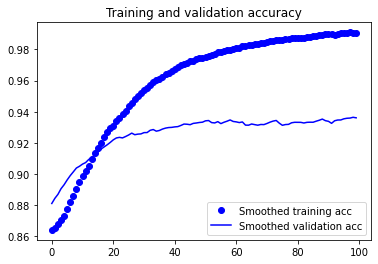

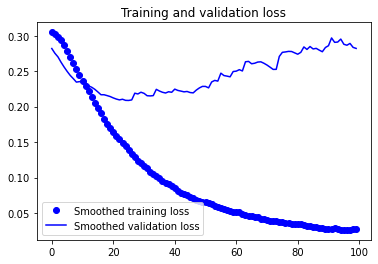

In [28]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

epochs = range(len(acc4))

plt.plot(epochs, smooth_curve(acc4), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc4), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss4), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss4), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Krzywe te wyglądają znacznie schludniej i stabilniej. Łatwiej możemy zaobserwować bezwzględną poprawę dokładności walidacji o ~1% na koniec procesu uczenia.

Należy zauważyć, że krzywa strat nie wykazuje żadnej realnej poprawy (w rzeczywistości ulega pogorszeniu). Możesz się zastanawiać, w jaki sposób można poprawić dokładność, jeśli strata nie maleje? Odpowiedź jest taka, że wyświetlamy średnią wartości strat punktowych, ale dla dokładności liczy się rozkład wartości strat, a nie ich średnia, ponieważ dokładność jest wynikiem binarnego progowania prawdopodobieństwa klasy przewidywanej przez model. Model może być nadal udoskonalany, nawet jeśli nie ma to odzwierciedlenia w średniej stracie.

Możemy teraz w końcu ocenić ten model na danych testowych:

In [30]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

#test_loss4, test_acc4 = model3.evaluate_generator(test_generator, steps=50)
test_loss4, test_acc4 = model3.evaluate(test_generator, steps=50)
print('test acc:', test_acc4)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 127s 1s/step - loss: 0.3472 - acc: 0.9380
test acc: 0.9380000233650208


Otrzymujemy tutaj dokładność testu ~93,8%. W oryginalnym konkursie Kaggle dotyczącym tego zbioru danych byłby to jeden z najlepszych wyników, ponieważ najlepsze wyniki wyniosły ~95%. Jednak stosując nowoczesne techniki głębokiego uczenia się, udało nam się osiągnąć ten wynik, wykorzystując jedynie bardzo niewielką (8%) część dostępnych danych uczących. Istnieje ogromna różnica pomiędzy możliwością trenowania na 20 000 próbkach zamiast na 2000 próbkach, jak również testowaniem na 2000 próbkach zamiast na 1000!

## Zapamiętaj: używanie sieci komunikacyjnych z małymi zbiorami danych

* Convnets to najlepszy typ modeli uczenia maszynowego do zadań związanych z wizją komputerową. Możliwe jest wytrenowanie modelu od zera nawet na bardzo małym zbiorze danych i to z przyzwoitymi wynikami.
* W przypadku małego zbioru danych głównym problemem będzie nadmierne dopasowanie. Powieoanie (augmentacja) danych to skuteczny sposób na walkę z nadmiernym dopasowaniem podczas pracy z obrazami.
* Ponowne wykorzystanie istniejącej sieci konwolucyjnej na nowym zbiorze danych (obrazów) jest łatwe dzięki ekstrakcji cech (uczeniu transferowym). Jest to bardzo cenna technika pracy z małymi zbiorami danych obrazu, która może znacznie poprawić Twoje wyniki.
* Jako uzupełnienie ekstrakcji cech można zastosować dostrajanie, które dostosowuje model do nowego problemu, w tym niektóre reprezentacje (wzorce) wyuczone wcześniej przez istniejący model (przy użyciu niezamrożonych warstw). To podnosi wydajność nieco bardziej.

Teraz masz solidny zestaw narzędzi do rozwiązywania problemów z klasyfikacją obrazów, szczególnie w przypadku małych zbiorów danych.

## Zadania

* Spróbuj odmrozić więcej warstw konwolucyjnych (np. z 4. bloku) i wytrenuj wcześniej wytrenowany model, aby zwiększyć dokładność modelu na danych testowych. Następnie porównaj wyniki i wyciągnij wniosek o udoskonaleniu modelu.
* Spróbuj wykorzystać wszystko, czego nauczyliśmy się do tej pory, zmieniając hiperparametry indywidualnie, bazując na doświadczeniach zdobytych podczas poprzednich eksperymentów oraz po poradach i trikach, których nauczyłeś się na wykładach.
* Jeśli dysponujesz wystarczająco mocną jednostką GPU, możesz spróbować zwiększyć ilość danych treningowych (z 2000 do kilku tysięcy, np.: 5000, 10000 czy 20000) i porównać wyniki z naszymi wynikami osiągniętymi w tym notebooku wcześniej.
* Opcjonalnie możesz sprawdzić inne typy baz konwersji, takie jak VGG19, Xception, InceptionV3 lub ResNet50.
* Proszę też sprawdzić tą technikę na innych danych uczących.